# SVM for classification

Load IRIS dataset, check its contents:


In [32]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[40:70])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [33]:
# for myself
# dir is used to see all attributes and methods
# instead of using data there is pandas library to see dataframe
import pandas as pd
dir(iris)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()
# to see target y in dataframe (types of iris)
df['target'] = iris.target
df.head()
iris.target_names
df[df.target==2].head()
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Split data into training and testing parts:

In [34]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
# test size 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [35]:
# another way to split the data
X = df.drop(['target', 'flower_name'],axis='columns')
X.head()
y = df.target
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)
len(X_train)
len(X_test)

30

Use a Support Vector Machine for classification:


In [36]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
# fit function is for training
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

In [ ]:
# for myself(also modifying the C parameter as in of the next questions)
# С is for soft margin
# SVMmodel=SVC(C=10)
# SVMmodel.fit(X_train,y_train)
# SVMmodel.score(X_test,y_test)

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [37]:
X = iris.data[:,0:2]
X.shape

(150, 2)

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

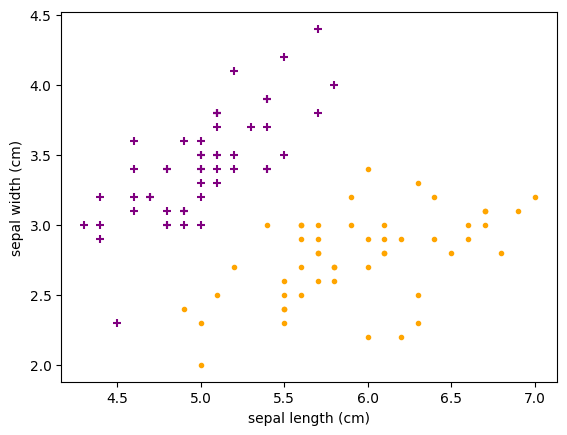

In [38]:
# for myself(another way to solve this problem)
from matplotlib import pyplot as plt
%matplotlib inline
df0 = df[df.target==0]
df1 = df[df.target==1]
# df2 = df[df.target==2]
df1.head()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'purple', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'orange', marker = '.')
# plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'grey', marker = '*')

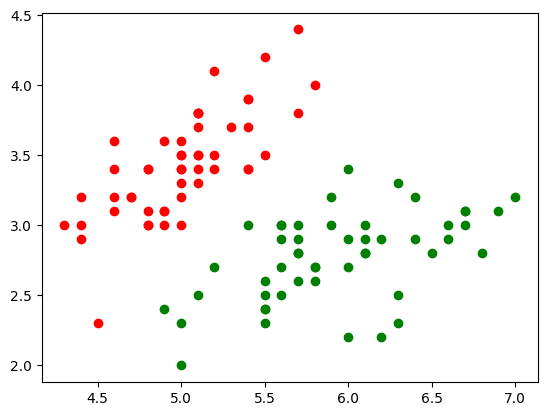

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X[y ==0,0],X[y==0,1],color ='red')
plt.scatter(X[y ==1,0],X[y==1,1],color ='green')
# plt.scatter(X[y ==2,0],X[y==2,1],color ='yellow')

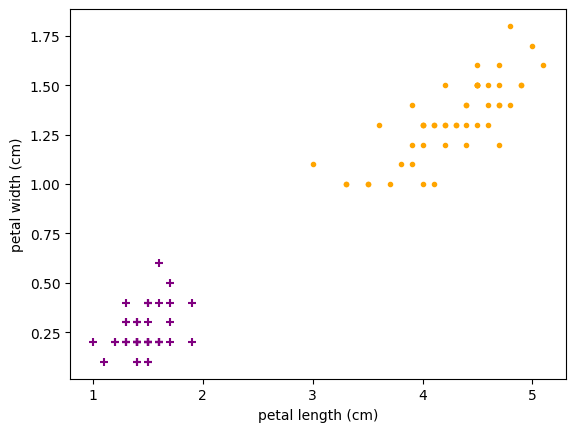

In [40]:
# with different features there is more clear distinction
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'purple', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'orange', marker = '.')

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [41]:
X = iris.data[iris.target!=2, 0:2]
print(X.shape)
y = iris.target[iris.target!=2]
SVMmodel_1 = SVC(kernel='linear',C = 200)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y,test_size=0.2)
SVMmodel_1.fit(X_train_1,y_train_1)
SVMmodel_1.score(X_test_1,y_test_1)

(100, 2)


1.0

In [42]:
#  This helps visualize the margin (the distance between the decision boundary and the support vectors).
import numpy as np
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

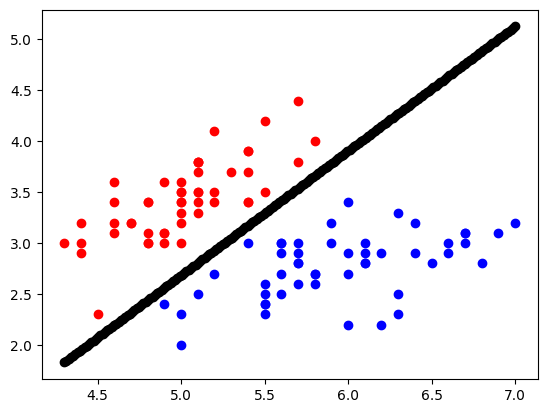

In [43]:
#
import numpy as np
supvectors=SVMmodel_1.support_vectors_

W=SVMmodel_1.coef_
b=SVMmodel_1.intercept_
# print(W)
# print(b)
x1=np.linspace(np.min(X[:,0]),np.max(X[:,0]),200)
x2=-b/W[0,1]-W[0,0]/W[0,1]*x1
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.scatter(x1,x2, color='black')

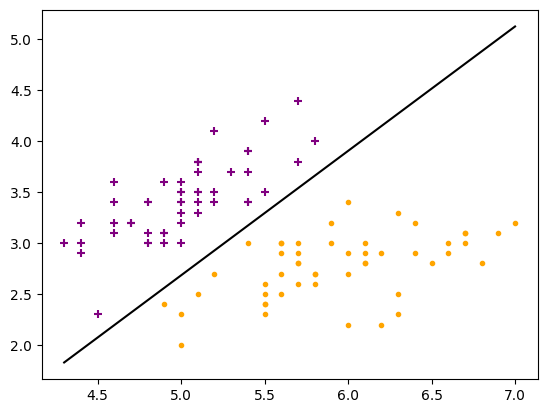

In [44]:
supvectors=SVMmodel_1.support_vectors_
# Plot the support vectors here

#Separating line coefficients:
W=SVMmodel_1.coef_
b=SVMmodel_1.intercept_
# plt.scatter(supvectors[:, 0], supvectors[:, 1],
#             s=100, facecolors='none', edgecolors='k', label='Support Vectors')

x = np.linspace(np.min(X[:,0]),np.max(X[:,0]),200)

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'purple', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'orange', marker = '.')

x2=-b/W[0,1]-W[0,0]/W[0,1]*x1
# y = -(W[0] * x + b) / W[1]
plt.plot(x, x2, color='black')

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

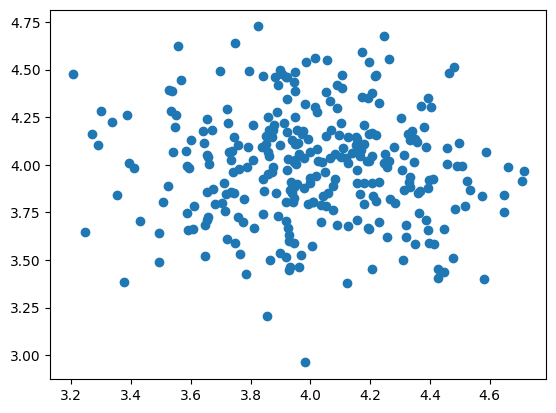

In [45]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

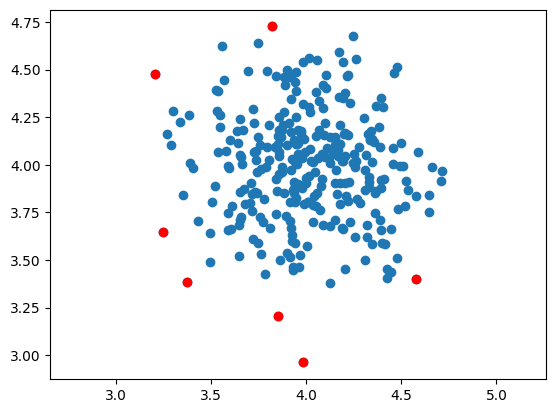

In [46]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

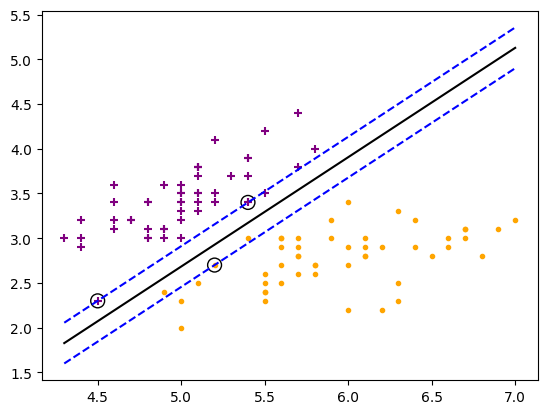

In [50]:
supvectors=SVMmodel_1.support_vectors_
# Plot the support vectors here

#Separating line coefficients:
W=SVMmodel_1.coef_
b=SVMmodel_1.intercept_
# plt.scatter(supvectors[:, 0], supvectors[:, 1],
#             s=100, facecolors='none', edgecolors='k', label='Support Vectors')

x = np.linspace(np.min(X[:,0]),np.max(X[:,0]),200)

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'purple', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'orange', marker = '.')

x2=-b/W[0,1]-W[0,0]/W[0,1]*x1
# y = -(W[0] * x + b) / W[1]
plt.plot(x, x2, color='black')

W_norm = np.linalg.norm(W)

margin1 = (-b + 1) / W[0,1] - (W[0,0] / W[0,1]) * x
margin2 = (-b - 1) / W[0,1] - (W[0,0] / W[0,1]) * x

plt.plot(x, margin1, color='blue', linestyle='dashed')
plt.plot(x, margin2, color='blue', linestyle='dashed')

plt.scatter(supvectors[:, 0], supvectors[:, 1],
            s=100, facecolors='none', edgecolors='k')

# plt.legend()
plt.show()



What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


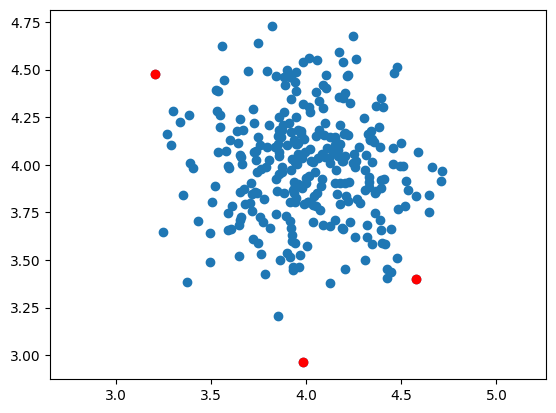

In [16]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()